# Lab Instructions

You are part of a data team for a financial institution that uses an AI model to determine who will and will not be granted a loan.  Recently, there have been complaints from customers that the model unfairly discriminates based on the applicant's age and sex. A court has ordered that the financial institution must provide information about how the model works.  

Data from recent loan applications is given in `loan_data.csv`.  The data dictionary is below:

| Feature              | Description | Data Type |
| :---------------- | :------: | ----: |
|person_age|Age of the person|Float
|person_gender|Gender of the person|Categorical
|person_education|Highest education level|Categorical
|person_income|Annual income|Float
|person_emp_exp|Years of employment experience|Integer
|person_home_ownership|Home ownership status (e.g., rent, own, mortgage)|Categorical
|loan_amnt|Loan amount requested|Float
|loan_intent|Purpose of the loan|Categorical
|loan_int_rate|Loan interest rate|Float
|loan_percent_income|Loan amount as a percentage of annual income|Float
|cb_person_cred_hist_length|Length of credit history in years|Float
|credit_score|Credit score of the person|Integer
|previous_loan_defaults_on_file|Indicator of previous loan defaults|Categorical
|loan_status (target variable)|Loan approval status: 1 = approved; 0 = rejected|Integer

Visualize the relationship between age, sex and 5 other features with `loan_status`.  Which features seem to drive the model's decision to grant a loan?  Which seem unrelated?  Should the financial institution be concerned about potential legal trouble?  Make sure to justify your answers with specific references to your visualizations.



/tmp/ipykernel_11324/2510937099.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(groups, labels=["Rejected (0)", "Approved (1)"], showfliers=False)


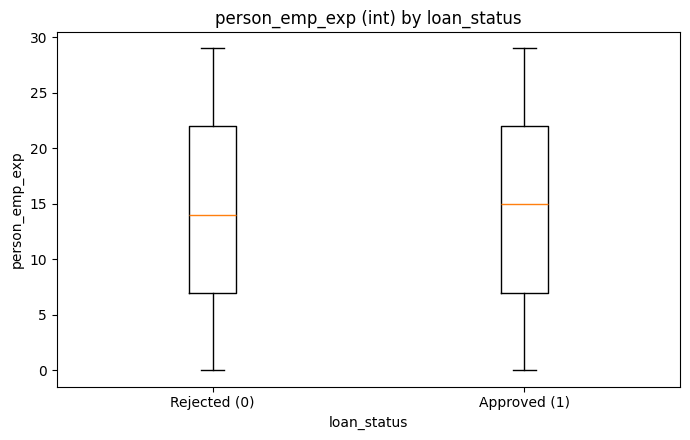

/tmp/ipykernel_11324/2510937099.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(groups, labels=["Rejected (0)", "Approved (1)"], showfliers=False)


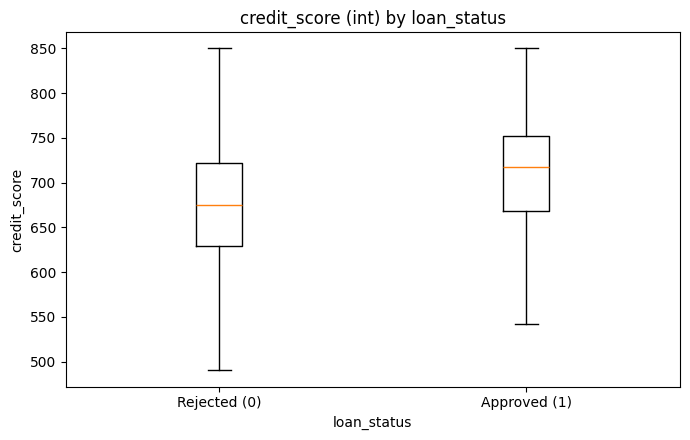

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("loan_data.csv")

df["person_emp_exp"] = df["person_emp_exp"].astype(int)
df["credit_score"] = df["credit_score"].astype(int)

int_features = ["person_emp_exp", "credit_score"]

def boxplot_by_status(data, feature, dtype_label="int"):
    fig, ax = plt.subplots(figsize=(7, 4.5))
    groups = [data.loc[data["loan_status"] == s, feature].dropna() for s in [0, 1]]
    ax.boxplot(groups, labels=["Rejected (0)", "Approved (1)"], showfliers=False)
    ax.set_title(f"{feature} ({dtype_label}) by loan_status")
    ax.set_ylabel(feature)
    ax.set_xlabel("loan_status")
    fig.tight_layout()
    plt.show()

for feat in int_features:
    boxplot_by_status(df, feat)

Here based on int data we can clearly see that higher credit score is more guaranteed of a higher approval, while employment experiencee is not too important.

/tmp/ipykernel_11324/3290158921.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(groups, labels=["Rejected (0)", "Approved (1)"], showfliers=False)


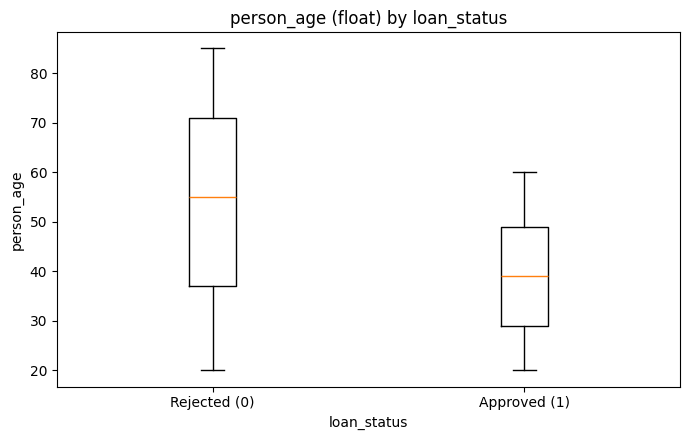

/tmp/ipykernel_11324/3290158921.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(groups, labels=["Rejected (0)", "Approved (1)"], showfliers=False)


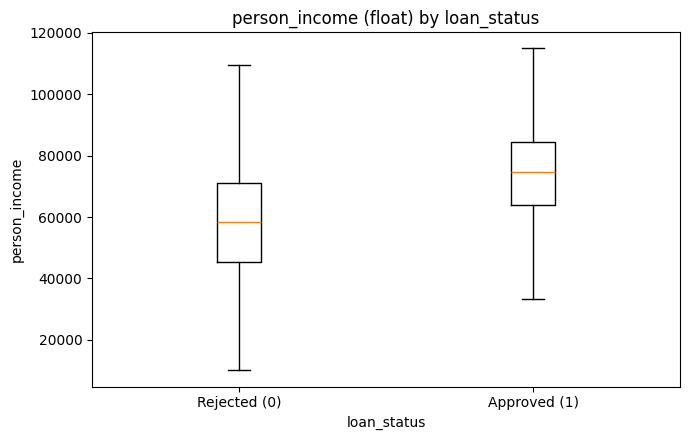

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("loan_data.csv")

df["person_age"] = df["person_age"].astype(float)
df["person_income"] = df["person_income"].astype(float)

float_features = ["person_age", "person_income"]

def boxplot_by_status(data, feature, dtype_label="float"):
    fig, ax = plt.subplots(figsize=(7, 4.5))
    groups = [data.loc[data["loan_status"] == s, feature].dropna() for s in [0, 1]]
    ax.boxplot(groups, labels=["Rejected (0)", "Approved (1)"], showfliers=False)
    ax.set_title(f"{feature} ({dtype_label}) by loan_status")
    ax.set_ylabel(feature)
    ax.set_xlabel("loan_status")
    fig.tight_layout()
    plt.show()

for feat in float_features:
    boxplot_by_status(df, feat)

Here based on float data we can clearly observe that age and income both highly matters looking at the facts the higher the income, while in range of 30~50 has a higher chance of approval.

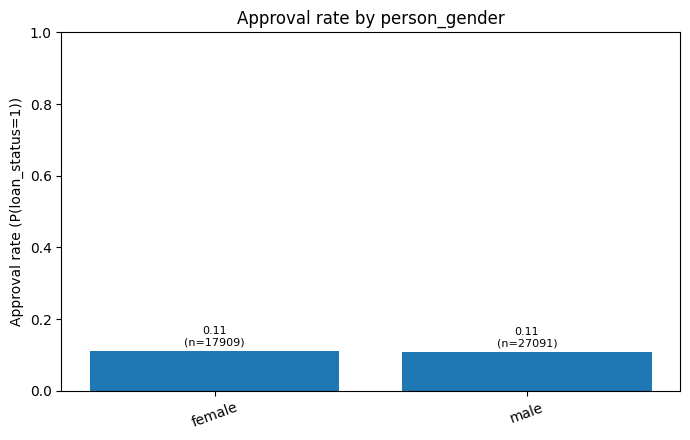

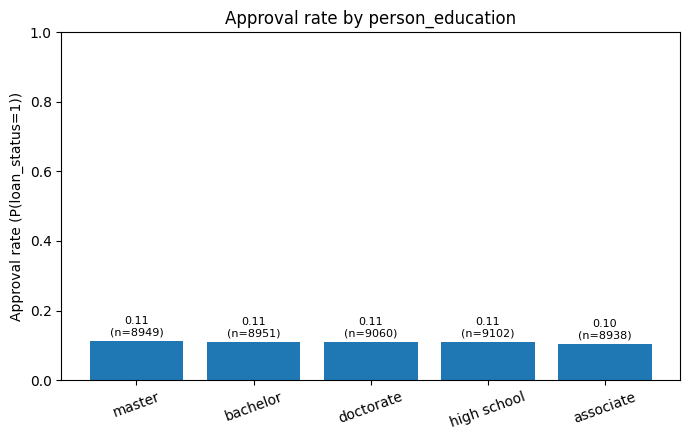

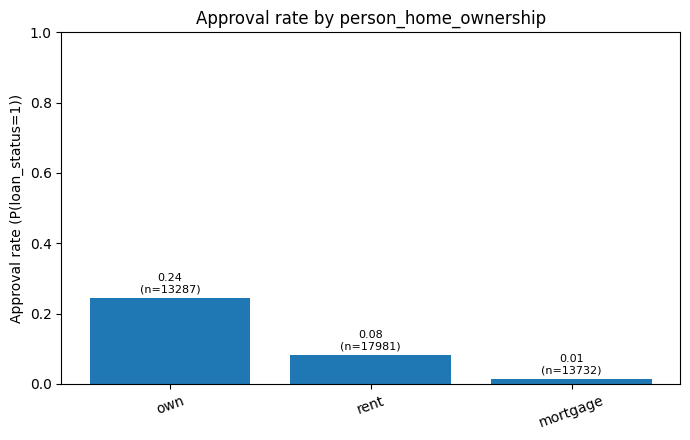

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("loan_data.csv")

categorical_features = ["person_gender", "person_education", "person_home_ownership"]

def approval_rate_bar(data, cat_col):
    fig, ax = plt.subplots(figsize=(7, 4.5))
    tmp = data.copy()
    tmp[cat_col] = tmp[cat_col].astype(str).str.strip().str.lower()

    rates = tmp.groupby(cat_col)["loan_status"].mean()
    counts = tmp[cat_col].value_counts()
    order = rates.sort_values(ascending=False).index
    rates = rates.loc[order]
    counts = counts.loc[order]

    bars = ax.bar(rates.index, rates.values)
    ax.set_ylim(0, 1)
    ax.set_ylabel("Approval rate (P(loan_status=1))")
    ax.set_title(f"Approval rate by {cat_col}")
    ax.tick_params(axis="x", rotation=20)
    for i, b in enumerate(bars):
        ax.text(
            b.get_x() + b.get_width()/2, b.get_height() + 0.01,
            f"{rates.values[i]:.2f}\n(n={counts.values[i]})",
            ha="center", va="bottom", fontsize=8
        )
    fig.tight_layout()
    plt.show()

for feat in categorical_features:
    approval_rate_bar(df, feat)


Here based on categorical data, we can observe definitely that people who do own have highest chance decreasing possibility can be observed going from own to mortgage. While on the other hand, education and gender does not affect the approval at all.

So we can conclude that first of all, gender did not matter. While age does matter since income is a factor mostly for people in the late 20's and early 60's I would say it is reasonable so it is not something that we have to worry about. Considering other features it is reasonable too, since owning a house is something the bank can hold if the person fails to pay back the loan, credit score and income are also factors that banks can believe in the person showing financial related features do matter while others did not.